# 01. Ridge and Lasso Regression | الانحدار ريدج ولاسو

## 📚 Prerequisites (What You Need First) | المتطلبات الأساسية

**BEFORE starting this notebook**, you should have completed:
- ✅ **Unit 1: All examples** - Data processing, linear regression, polynomial regression
- ✅ **Understanding of overfitting**: What happens when models are too complex
- ✅ **Basic linear algebra**: Understanding coefficients and regularization

**If you haven't completed these**, you might struggle with:
- Understanding why regularization is needed
- Knowing when to use Ridge vs Lasso
- Understanding how alpha (regularization strength) works

---

## 🔗 Where This Notebook Fits | مكان هذا الدفتر

**This is Unit 2, Example 1** - it solves the overfitting problem from polynomial regression!

**Why this example FIRST in Unit 2?**
- **Before** you can use advanced techniques, you need to solve overfitting
- **Before** you can build robust models, you need regularization
- **Before** you can handle multicollinearity, you need Ridge/Lasso

**Builds on**: 
- 📓 Unit 1, Example 4: Linear Regression (we know basic regression)
- 📓 Unit 1, Example 5: Polynomial Regression (we saw overfitting!)

**Leads to**: 
- 📓 Example 2: Cross-Validation (evaluates models properly)
- 📓 Unit 3: Classification (same regularization concepts apply)
- 📓 All ML models (regularization is universal!)

**Why this order?**
1. Ridge/Lasso solve **overfitting** (critical problem from Unit 1)
2. Ridge/Lasso teach **regularization** (essential ML concept)
3. Ridge/Lasso show **feature selection** (Lasso automatically selects features)

---

## The Story: Preventing Overfitting | القصة: منع الإفراط في التلائم

Imagine you're learning to drive. **Before** regularization, you memorize every turn on the training route perfectly, but fail on new routes (overfitting). **After** regularization, you learn general driving principles that work everywhere!

Same with machine learning: **Before** Ridge/Lasso, models memorize training data perfectly but fail on new data. **After** Ridge/Lasso, models learn general patterns that generalize well!

---

## Why Ridge and Lasso Matter | لماذا يهم ريدج ولاسو؟

Regularization prevents overfitting:
- **Ridge (L2)**: Shrinks coefficients toward zero (keeps all features)
- **Lasso (L1)**: Shrinks some coefficients to exactly zero (feature selection!)
- **Both**: Prevent overfitting by penalizing large coefficients
- **Alpha**: Controls regularization strength (higher = more regularization)

## Learning Objectives | أهداف التعلم
1. Build Ridge regression models (L2 regularization)
2. Build Lasso regression models (L1 regularization)
3. Understand the difference between Ridge and Lasso
4. Tune alpha hyperparameter
5. Compare regularized models with linear regression
6. Understand when to use each method

In [1]:
# Step 1: Import necessary libraries
# These libraries help us build regularized regression models

import pandas as pd  # For data manipulation
import numpy as np   # For numerical operations
import matplotlib.pyplot as plt  # For visualizations
from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.linear_model import (
    LinearRegression,  # Baseline model (no regularization)
    Ridge,             # L2 regularization (shrinks coefficients)
    Lasso              # L1 regularization (shrinks + feature selection)
)
from sklearn.preprocessing import StandardScaler  # Important! Regularization needs scaled features
from sklearn.metrics import mean_squared_error, r2_score  # For evaluation

print("✅ Libraries imported successfully!")
print("\n📚 What each model does:")
print("   - LinearRegression: No regularization (baseline)")
print("   - Ridge: L2 regularization (keeps all features, shrinks coefficients)")
print("   - Lasso: L1 regularization (removes some features, shrinks others)")
print("   - StandardScaler: CRITICAL! Regularization requires scaled features!")

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


✅ Libraries imported successfully!

📚 What each model does:
   - LinearRegression: No regularization (baseline)
   - Ridge: L2 regularization (keeps all features, shrinks coefficients)
   - Lasso: L1 regularization (removes some features, shrinks others)
   - StandardScaler: CRITICAL! Regularization requires scaled features!


## Part 1: Setting the Scene | الجزء الأول: إعداد المشهد

**BEFORE**: We saw overfitting in polynomial regression - models that fit training data too well but fail on new data.

**AFTER**: We'll use Ridge and Lasso regularization to prevent overfitting by penalizing large coefficients!

**Why this matters**: Overfitting is the #1 problem in ML. Regularization is the #1 solution!

---

## Step 1: Load Real-World Data with Multicollinearity | الخطوة 1: تحميل بيانات العالم الحقيقي مع ارتباط متعدد

**BEFORE**: We need to learn regularization, but we need real data that has multicollinearity (correlated features).

**AFTER**: We'll load the California Housing dataset - real data where features are naturally correlated (multicollinearity) - this is when regularization helps most!

**Why California Housing?** This is REAL data from the 1990 census where features like AveRooms, AveBedrms, and Population are naturally correlated. When features are correlated, regular linear regression struggles. Ridge/Lasso handle this better!

In [2]:
# Load real-world California Housing dataset
# This dataset naturally has multicollinearity (correlated features)
# Multicollinearity = features are correlated with each other
# This is a common real-world problem that regularization solves!

from sklearn.datasets import fetch_california_housing

print("\n📥 Loading California Housing dataset...")
print("تحميل مجموعة بيانات كاليفورنيا للإسكان...")

housing_data = fetch_california_housing()

# Create DataFrame
df = pd.DataFrame(housing_data.data, columns=housing_data.feature_names)
df['target'] = housing_data.target

print(f"\n✅ Real-world California Housing data loaded!")
print(f"   📊 This is REAL data from the 1990 California census")
print(f"   📈 Contains {len(df)} housing districts with {len(df.columns)-1} features")
print(f"\n🔍 Notice:")
print("   - Features like AveRooms, AveBedrms, Population are naturally correlated")
print("   - This multicollinearity makes regularization important!")
print("   - Ridge/Lasso will handle this better than regular linear regression")



📥 Loading California Housing dataset...
تحميل مجموعة بيانات كاليفورنيا للإسكان...

✅ Real-world California Housing data loaded!
   📊 This is REAL data from the 1990 California census
   📈 Contains 20640 housing districts with 8 features

🔍 Notice:
   - Features like AveRooms, AveBedrms, Population are naturally correlated
   - This multicollinearity makes regularization important!
   - Ridge/Lasso will handle this better than regular linear regression


In [3]:
# Data is already loaded from California Housing above
# Let's check for multicollinearity in the real data
print("\n📊 Checking for multicollinearity in real data...")
print("   (Correlated features make regularization important)")

# Check correlation between features
correlation_matrix = df[housing_data.feature_names].corr()
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.7:  # High correlation threshold
            high_corr_pairs.append((
                correlation_matrix.columns[i],
                correlation_matrix.columns[j],
                corr_val
            ))

if high_corr_pairs:
    print(f"\n   ✅ Found {len(high_corr_pairs)} highly correlated feature pairs:")
    for feat1, feat2, corr in high_corr_pairs[:3]:  # Show first 3
        print(f"      - {feat1} ↔ {feat2}: {corr:.3f}")
    print("   - This multicollinearity makes Ridge/Lasso important!")
else:
    print("   - Features have moderate correlation (still benefits from regularization)")


📊 Checking for multicollinearity in real data...
   (Correlated features make regularization important)

   ✅ Found 2 highly correlated feature pairs:
      - AveRooms ↔ AveBedrms: 0.848
      - Latitude ↔ Longitude: -0.925
   - This multicollinearity makes Ridge/Lasso important!


In [4]:
# Data is already loaded - no need to generate synthetic data!
# The California Housing dataset has:
# - 8 real features (MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude)
# - Natural multicollinearity (correlated features)
# - Real target (MedHouseVal)

print(f"\n📊 Real Data Summary:")
print(f"   Shape: {df.shape}")
print(f"   Features: {', '.join(housing_data.feature_names[:4])}... and more")
print(f"   Target: Median House Value (in $100,000s)")
print(f"\n📄 First 5 rows:")
print(df.head())
print("\n🔍 Notice:")
print("   - This is REAL data from 1990 California census")
print("   - Features are naturally correlated (multicollinearity)")
print("   - Regular regression may struggle; Ridge/Lasso will handle this better!")


📊 Real Data Summary:
   Shape: (20640, 9)
   Features: MedInc, HouseAge, AveRooms, AveBedrms... and more
   Target: Median House Value (in $100,000s)

📄 First 5 rows:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  

🔍 Notice:
   - This is REAL data from 1990 California census
   - Features are naturally correlated (multicollinearity)
   - Regular regression may struggle; Ridge/Lasso will handle this better!


In [5]:
# Prepare features (X) and target (y) from real data
X_data = df[housing_data.feature_names]  # All 8 features
y_data = df['target']  # Median House Value

print(f"\n✅ Data prepared for modeling:")
print(f"   Features (X): {X_data.shape[1]} features")
print(f"   Target (y): {y_data.shape[0]} samples")
print(f"   Feature names: {', '.join(X_data.columns[:4])}... and more")
# train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# - Splits data into training and testing sets
# - X: Features (input variables), y: Target (output variable)
# - test_size=0.2: 20% for testing, 80% for training
# - random_state=42: Seed for reproducibility (same split every time)
# - stratify=y: Maintains class distribution in train/test (for classification)
# - Returns: X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(
    X_data, y_data, test_size=0.2, random_state=42
)

# Scale features (important for regularization)
# Regularization is sensitive to feature scale, so we MUST scale first!
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("   ✅ Data split and scaled!")
print(f"   Training set: {X_train.shape[0]} samples")
print(f"   Test set: {X_test.shape[0]} samples")


✅ Data prepared for modeling:
   Features (X): 8 features
   Target (y): 20640 samples
   Feature names: MedInc, HouseAge, AveRooms, AveBedrms... and more
   ✅ Data split and scaled!
   Training set: 16512 samples
   Test set: 4128 samples


In [6]:
print("\n" + "=" * 60)
print("1. Linear Regression (Baseline)")
print("الانحدار الخطي (خط الأساس)")
print("=" * 60)

# Try regular linear regression first (no regularization)
# This is our baseline to compare against
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
lr_pred = lr.predict(X_test_scaled)

lr_mse = mean_squared_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)

print(f"\n📊 Linear Regression Results:")
print(f"   MSE: {lr_mse:.4f} (lower is better)")
print(f"   R² Score: {lr_r2:.4f} (closer to 1 is better)")
print(f"\n   Coefficients (first 5): {lr.coef_[:5]}")
print(f"   Notice: Some coefficients might be large or unstable")
print(f"   Regularization will help stabilize these!")



1. Linear Regression (Baseline)
الانحدار الخطي (خط الأساس)

📊 Linear Regression Results:
   MSE: 0.5559 (lower is better)
   R² Score: 0.5758 (closer to 1 is better)

   Coefficients (first 5): [ 0.85438303  0.12254624 -0.29441013  0.33925949 -0.00230772]
   Notice: Some coefficients might be large or unstable
   Regularization will help stabilize these!


In [7]:
# Note: Scaling was done in cell 7 above
# This cell is kept for reference but scaling happens earlier now

In [8]:
print("\n" + "=" * 60)
print("2. Ridge Regression (L2 Regularization)")
print("الانحدار ريدج (التنظيم L2)")
print("=" * 60)

# Ridge regression with different alpha values
# Alpha = regularization strength (higher = more regularization)
# Why try different alphas? We need to find the best balance!
alphas = [0.01, 0.1, 1.0, 10.0, 100.0]
ridge_results = []

print("\n   Trying different alpha values...")
for alpha in alphas:
    ridge = Ridge(alpha=alpha)  # Create Ridge model with this alpha
    ridge.fit(X_train_scaled, y_train)  # Train on scaled data
    ridge_pred = ridge.predict(X_test_scaled)  # Predict on test data
    
    mse = mean_squared_error(y_test, ridge_pred)
    r2 = r2_score(y_test, ridge_pred)
    
    ridge_results.append({
        'alpha': alpha,
        'mse': mse,
        'r2': r2,
        'model': ridge
    })
    print(f"   Alpha {alpha:6.2f}: MSE = {mse:.4f}, R² = {r2:.4f}")



2. Ridge Regression (L2 Regularization)
الانحدار ريدج (التنظيم L2)

   Trying different alpha values...
   Alpha   0.01: MSE = 0.5559, R² = 0.5758
   Alpha   0.10: MSE = 0.5559, R² = 0.5758
   Alpha   1.00: MSE = 0.5559, R² = 0.5758
   Alpha  10.00: MSE = 0.5555, R² = 0.5761
   Alpha 100.00: MSE = 0.5533, R² = 0.5778


In [9]:
print("\n" + "=" * 60)
print("3. Lasso Regression (L1 Regularization)")
print("الانحدار لاسو (التنظيم L1)")
print("=" * 60)

# Lasso regression with different alpha values
# Lasso does feature selection - sets some coefficients to zero!
lasso_results = []

print("\n   Trying different alpha values...")
for alpha in alphas:
    lasso = Lasso(alpha=alpha)  # Create Lasso model
    lasso.fit(X_train_scaled, y_train)  # Train on scaled data
    lasso_pred = lasso.predict(X_test_scaled)  # Predict
    
    mse = mean_squared_error(y_test, lasso_pred)
    r2 = r2_score(y_test, lasso_pred)
    
    # Count non-zero coefficients (features that Lasso kept)
    # Why check this? Lasso removes features by setting coefficients to zero!
    n_features = np.sum(np.abs(lasso.coef_) > 0.01)
    
    lasso_results.append({
        'alpha': alpha,
        'mse': mse,
        'r2': r2,
        'n_features': n_features,  # How many features Lasso kept
        'model': lasso
    })
    print(f"   Alpha {alpha:6.2f}: MSE = {mse:.4f}, R² = {r2:.4f}, Features = {n_features}/{len(X_data.columns)}")



3. Lasso Regression (L1 Regularization)
الانحدار لاسو (التنظيم L1)

   Trying different alpha values...
   Alpha   0.01: MSE = 0.5483, R² = 0.5816, Features = 7/8
   Alpha   0.10: MSE = 0.6796, R² = 0.4814, Features = 3/8
   Alpha   1.00: MSE = 1.3107, R² = -0.0002, Features = 0/8
   Alpha  10.00: MSE = 1.3107, R² = -0.0002, Features = 0/8
   Alpha 100.00: MSE = 1.3107, R² = -0.0002, Features = 0/8


In [10]:
# Try different alpha values
alphas = [0.01, 0.1, 1.0, 10.0, 100.0]
ridge_results = []
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)
    ridge_pred = ridge.predict(X_test_scaled)
    mse = mean_squared_error(y_test, ridge_pred)
    r2 = r2_score(y_test, ridge_pred)
    ridge_results.append({
        'alpha': alpha,
        'mse': mse,
        'r2': r2,
        'model': ridge
    })

In [11]:
# Find best alpha
best_ridge = min(ridge_results, key=lambda x: x['mse'])
print(f"\nBest Alpha: {best_ridge['alpha']}")
print(f"Best MSE: {best_ridge['mse']:.4f}")
print(f"Best R²: {best_ridge['r2']:.4f}")


Best Alpha: 100.0
Best MSE: 0.5533
Best R²: 0.5778


In [12]:
# Find best alpha
best_lasso = min(lasso_results, key=lambda x: x['mse'])
print(f"\nBest Alpha: {best_lasso['alpha']}")
print(f"Best MSE: {best_lasso['mse']:.4f}")
print(f"Best R²: {best_lasso['r2']:.4f}")
print(f"Features used: {best_lasso['n_features']}/{len(X_data.columns)}")


Best Alpha: 0.01
Best MSE: 0.5483
Best R²: 0.5816
Features used: 7/8


In [13]:
# 4. Comparison
print("\n" + "=" * 60)
print("4. Model Comparison")
print("مقارنة النماذج")
print("=" * 60)
# pd.DataFrame(data)
# - pd.DataFrame(): Creates pandas DataFrame (2D table-like structure)
# - data: Dictionary where keys become column names, values become column data
#   - Each key-value pair: key = column name, value = list of values for that column
# - Returns DataFrame with rows and columns
# - DataFrame is the main pandas data structure (like Excel spreadsheet in Python)

comparison = pd.DataFrame({
    'Model': ['Linear Regression', f'Ridge (α={best_ridge["alpha"]})',
              f'Lasso (α={best_lasso["alpha"]})'],
    'Test MSE': [lr_mse, best_ridge['mse'], best_lasso['mse']],
    'Test R²': [lr_r2, best_ridge['r2'], best_lasso['r2']]
})
print("\nComparison Table:")
print(comparison.to_string(index=False))

# Add interpretation
print("\n" + "=" * 60)
print("💡 Interpreting the Comparison | تفسير المقارنة")
print("=" * 60)

# Find best model
best_mse_idx = comparison['Test MSE'].idxmin()
best_r2_idx = comparison['Test R²'].idxmin()
best_model_mse = comparison.loc[best_mse_idx, 'Model']
best_model_r2 = comparison.loc[best_r2_idx, 'Model']

print(f"\n📊 Best Model by MSE: {best_model_mse}")
print(f"   - Lowest error: {comparison['Test MSE'].min():.4f}")
print(f"   - This model has the smallest prediction errors")

print(f"\n📊 Best Model by R²: {best_model_r2}")
print(f"   - Highest R²: {comparison['Test R²'].max():.4f}")
print(f"   - This model explains the most variance")

print(f"\n🔍 Key Observations:")
mse_diff = comparison['Test MSE'].max() - comparison['Test MSE'].min()
r2_diff = comparison['Test R²'].max() - comparison['Test R²'].min()

if mse_diff < 0.01:
    print(f"   - ✅ All models perform similarly (MSE difference: {mse_diff:.4f})")
    print(f"   - Regularization didn't significantly improve performance")
    print(f"   - Original model may not have overfitting issues")
else:
    print(f"   - ⚠️  Significant performance difference (MSE range: {mse_diff:.4f})")
    print(f"   - Regularization {'improved' if best_model_mse != 'Linear Regression' else 'did not improve'} performance")

if r2_diff < 0.01:
    print(f"   - ✅ R² scores are very close (difference: {r2_diff:.4f})")
else:
    print(f"   - ⚠️  R² scores differ (range: {r2_diff:.4f})")

print(f"\n📚 What This Teaches Us:")
print(f"   - Compare models using multiple metrics (MSE and R²)")
print(f"   - Lower MSE = better predictions (less error)")
print(f"   - Higher R² = better fit (explains more variance)")
print(f"   - Regularization (Ridge/Lasso) helps when there's overfitting")
print(f"   - If all models are similar, original model may be fine")
print(f"   - Lasso has advantage: automatic feature selection (removes irrelevant features)")

# Check if Lasso removed features
if best_lasso['n_features'] < len(X_data.columns):
    print(f"\n💡 Lasso Feature Selection:")
    print(f"   - Lasso used only {best_lasso['n_features']}/{len(X_data.columns)} features")
    print(f"   - Removed {len(X_data.columns) - best_lasso['n_features']} features (set coefficients to 0)")
    print(f"   - This is Lasso's unique advantage: automatic feature selection!")
    print(f"   - Simpler model (fewer features) = easier to interpret")


4. Model Comparison
مقارنة النماذج

Comparison Table:
            Model  Test MSE  Test R²
Linear Regression  0.555892 0.575788
  Ridge (α=100.0)  0.553266 0.577791
   Lasso (α=0.01)  0.548255 0.581615

💡 Interpreting the Comparison | تفسير المقارنة

📊 Best Model by MSE: Lasso (α=0.01)
   - Lowest error: 0.5483
   - This model has the smallest prediction errors

📊 Best Model by R²: Linear Regression
   - Highest R²: 0.5816
   - This model explains the most variance

🔍 Key Observations:
   - ✅ All models perform similarly (MSE difference: 0.0076)
   - Regularization didn't significantly improve performance
   - Original model may not have overfitting issues
   - ✅ R² scores are very close (difference: 0.0058)

📚 What This Teaches Us:
   - Compare models using multiple metrics (MSE and R²)
   - Lower MSE = better predictions (less error)
   - Higher R² = better fit (explains more variance)
   - Regularization (Ridge/Lasso) helps when there's overfitting
   - If all models are similar, o

In [14]:
# 5. Coefficient Comparison
print("\n" + "=" * 60)
print("5. Coefficient Comparison")
print("مقارنة المعاملات")
print("=" * 60)
# pd.DataFrame(data)
# - pd.DataFrame(): Creates pandas DataFrame (2D table-like structure)
# - data: Dictionary where keys become column names, values become column data
#   - Each key-value pair: key = column name, value = list of values for that column
# - Returns DataFrame with rows and columns
# - DataFrame is the main pandas data structure (like Excel spreadsheet in Python)

coef_comparison = pd.DataFrame({
    'Feature': X_data.columns,
    'Linear': lr.coef_,
    'Ridge': best_ridge['model'].coef_,
    'Lasso': best_lasso['model'].coef_
})
print("\nCoefficient Comparison (first 5 features):")
print(coef_comparison.head().to_string(index=False))
print("\nLasso shrinks many coefficients to zero (feature selection)")
print("لاسو يقلص العديد من المعاملات إلى الصفر (اختيار الميزات)")

# Add interpretation
print("\n" + "=" * 60)
print("💡 Understanding Coefficient Differences | فهم اختلافات المعاملات")
print("=" * 60)

# Count zero coefficients
lasso_zeros = (np.abs(best_lasso['model'].coef_) < 0.01).sum()
ridge_zeros = (np.abs(best_ridge['model'].coef_) < 0.01).sum()
linear_zeros = (np.abs(lr.coef_) < 0.01).sum()

print(f"\n📊 Coefficient Analysis:")
print(f"   - Linear Regression: {linear_zeros} coefficients near zero")
print(f"   - Ridge: {ridge_zeros} coefficients near zero (shrinks but keeps all)")
print(f"   - Lasso: {lasso_zeros} coefficients set to zero (feature selection!)")

print(f"\n🔍 What This Shows:")
print(f"   - Ridge: Shrinks coefficients toward 0 but keeps all features")
print(f"   - Lasso: Can completely remove features (coefficient = 0)")
print(f"   - Lasso's sparsity: Only {best_lasso['n_features']} features have non-zero coefficients")

# Compare coefficient magnitudes
coef_diff_ridge = np.abs(lr.coef_ - best_ridge['model'].coef_)
coef_diff_lasso = np.abs(lr.coef_ - best_lasso['model'].coef_)

print(f"\n📊 Coefficient Shrinking:")
print(f"   - Ridge average change: {coef_diff_ridge.mean():.4f}")
print(f"   - Lasso average change: {coef_diff_lasso.mean():.4f}")
if coef_diff_lasso.mean() > coef_diff_ridge.mean():
    print(f"   - Lasso shrinks coefficients more aggressively")

print(f"\n📚 What This Teaches Us:")
print(f"   - Regularization reduces coefficient magnitudes (prevents overfitting)")
print(f"   - Ridge: Gentle shrinking, keeps all features")
print(f"   - Lasso: Aggressive shrinking, removes irrelevant features")
print(f"   - Smaller coefficients = simpler model = better generalization")
print(f"   - Lasso is useful when you have many features (automatic feature selection)")
print(f"   - Ridge is useful when all features might be relevant")


5. Coefficient Comparison
مقارنة المعاملات

Coefficient Comparison (first 5 features):
   Feature    Linear     Ridge     Lasso
    MedInc  0.854383  0.848139  0.800957
  HouseAge  0.122546  0.129512  0.127087
  AveRooms -0.294410 -0.274522 -0.162759
 AveBedrms  0.339259  0.314804  0.206207
Population -0.002308 -0.000024 -0.000000

Lasso shrinks many coefficients to zero (feature selection)
لاسو يقلص العديد من المعاملات إلى الصفر (اختيار الميزات)

💡 Understanding Coefficient Differences | فهم اختلافات المعاملات

📊 Coefficient Analysis:
   - Linear Regression: 1 coefficients near zero
   - Ridge: 1 coefficients near zero (shrinks but keeps all)
   - Lasso: 1 coefficients set to zero (feature selection!)

🔍 What This Shows:
   - Ridge: Shrinks coefficients toward 0 but keeps all features
   - Lasso: Can completely remove features (coefficient = 0)
   - Lasso's sparsity: Only 7 features have non-zero coefficients

📊 Coefficient Shrinking:
   - Ridge average change: 0.0250
   - Lasso aver

## Step 7: Decision Framework - When to Use Ridge vs Lasso | الخطوة 7: إطار القرار - متى تستخدم ريدج مقابل لاسو

**BEFORE**: You've learned how to build Ridge and Lasso models, but when should you use each one?

**AFTER**: You'll have a clear decision framework to choose between Ridge, Lasso, or regular Linear Regression!

**Why this matters**: Using the wrong regularization method can:
- **Miss important features** → Lasso removes features you need
- **Keep irrelevant features** → Ridge keeps all features even when some are noise
- **Poor performance** → Wrong method leads to worse predictions

---

### 🎯 Decision Framework: Ridge vs Lasso vs Linear Regression | إطار القرار: ريدج مقابل لاسو مقابل الانحدار الخطي

**Key Question**: Should I use **LINEAR REGRESSION**, **RIDGE**, or **LASSO**?

#### Decision Tree:

```
Do you have overfitting?
├─ NO → Use LINEAR REGRESSION ✅
│   └─ Why? No need for regularization if model generalizes well
│
└─ YES → Check your situation:
    ├─ Many features (>20)? → Continue to next step
    │
    ├─ Need feature selection? → Use LASSO ✅
    │   └─ Why? Lasso removes irrelevant features automatically
    │
    ├─ Multicollinearity present? → Use RIDGE ✅
    │   └─ Why? Ridge handles correlated features better
    │
    ├─ All features important? → Use RIDGE ✅
    │   └─ Why? Ridge keeps all features, just shrinks them
    │
    └─ Want interpretability? → Use LASSO ✅
        └─ Why? Fewer features = simpler model
```

#### Detailed Decision Process:

```
Step 1: Check if regularization is needed
├─ Train R² >> Test R²? → YES, overfitting present
│   └─ Use Ridge or Lasso
│
└─ Train R² ≈ Test R²? → NO, no overfitting
    └─ Use Linear Regression (simpler)

Step 2: If overfitting, choose regularization type
├─ Do you have many features (>20)?
│   ├─ YES → Continue to step 3
│   └─ NO → Try Ridge first (simpler)
│
├─ Do you need feature selection?
│   ├─ YES → Use LASSO
│   │   └─ Why? Automatically removes irrelevant features
│   └─ NO → Continue to step 4
│
├─ Is there multicollinearity (correlated features)?
│   ├─ YES → Use RIDGE
│   │   └─ Why? Ridge handles correlations better
│   └─ NO → Continue to step 5
│
└─ Are all features potentially important?
    ├─ YES → Use RIDGE
    │   └─ Why? Keeps all features, just shrinks them
    └─ NO → Use LASSO
        └─ Why? Removes irrelevant features
```

---

### 📊 Comparison Table: Linear vs Ridge vs Lasso | جدول المقارنة

| Method | When to Use | Pros | Cons | Example |
|--------|-------------|------|------|---------|
| **Linear Regression** | No overfitting, few features, interpretable | • Simple<br>• Fast<br>• Interpretable<br>• No hyperparameters | • Can overfit<br>• Sensitive to outliers<br>• Can't handle many features | Small dataset, < 10 features |
| **Ridge (L2)** | Overfitting, multicollinearity, all features important | • Prevents overfitting<br>• Handles multicollinearity<br>• Keeps all features<br>• Stable | • Doesn't remove features<br>• All features contribute<br>• Less interpretable | Many correlated features, all potentially important |
| **Lasso (L1)** | Overfitting, many features, need feature selection | • Prevents overfitting<br>• Automatic feature selection<br>• More interpretable<br>• Simpler models | • Can remove important features<br>• Unstable with correlated features<br>• May over-regularize | High-dimensional data, feature selection needed |

---

### ✅ When to Use Each Method | متى تستخدم كل طريقة

#### Use Linear Regression when:
1. **No Overfitting** ✅
   - Train and test performance are similar
   - Model generalizes well
   - **Example**: Small dataset, few features, good performance

2. **Few Features** ✅
   - Less than 10-15 features
   - All features are important
   - **Example**: House price from size, bedrooms, age

3. **Interpretability Critical** ✅
   - Need to understand exact coefficients
   - No regularization complexity needed
   - **Example**: Medical diagnosis, regulatory compliance

#### Use Ridge Regression when:
1. **Overfitting Present** ✅
   - Train R² much higher than test R²
   - Model memorizes training data
   - **Example**: Polynomial regression with high degree

2. **Multicollinearity** ✅
   - Features are highly correlated
   - Ridge handles correlations better than Lasso
   - **Example**: House features (size, rooms, area all correlated)

3. **All Features Important** ✅
   - Don't want to remove any features
   - Just want to shrink coefficients
   - **Example**: All features are domain-relevant

4. **Many Features** ✅
   - 20+ features
   - Need regularization but want to keep all features
   - **Example**: 50+ features from feature engineering

#### Use Lasso Regression when:
1. **Feature Selection Needed** ✅
   - Many features, some are noise
   - Want automatic feature selection
   - **Example**: 100+ features, need to find important ones

2. **Sparse Solution** ✅
   - Expect only few features matter
   - Want interpretable model
   - **Example**: Gene expression data (few genes matter)

3. **High-Dimensional Data** ✅
   - More features than samples
   - Need to reduce dimensionality
   - **Example**: Text data with thousands of features

---

### ❌ When NOT to Use Each Method | متى لا تستخدم كل طريقة

#### Don't use Linear Regression when:
1. **Severe Overfitting** ❌
   - Train R² >> Test R²
   - **Use Instead**: Ridge or Lasso

2. **Many Features** ❌
   - 50+ features
   - **Use Instead**: Ridge or Lasso

3. **Multicollinearity** ❌
   - Highly correlated features
   - **Use Instead**: Ridge

#### Don't use Ridge when:
1. **Feature Selection Needed** ❌
   - Want to remove irrelevant features
   - **Use Instead**: Lasso

2. **Sparse Solution Expected** ❌
   - Only few features matter
   - **Use Instead**: Lasso

#### Don't use Lasso when:
1. **Multicollinearity Present** ❌
   - Features are highly correlated
   - Lasso may randomly select one
   - **Use Instead**: Ridge

2. **All Features Important** ❌
   - Don't want to remove any features
   - **Use Instead**: Ridge

3. **More Features than Samples** ❌
   - Lasso can select at most n features (n = samples)
   - **Use Instead**: Ridge or Elastic Net

---

### 📊 Real-World Examples | أمثلة من العالم الحقيقي

#### Example 1: House Price Prediction (10 features) ✅ LINEAR REGRESSION
- **Features**: Size, bedrooms, age, location, etc. (10 total)
- **Overfitting**: No (train R² = 0.85, test R² = 0.83)
- **Decision**: ✅ Use Linear Regression
- **Reasoning**: No overfitting, few features, all important

#### Example 2: House Price Prediction (50 features) ✅ RIDGE
- **Features**: Size, bedrooms, age, location, neighborhood stats, etc. (50 total)
- **Overfitting**: Yes (train R² = 0.95, test R² = 0.75)
- **Multicollinearity**: Yes (size, rooms, area all correlated)
- **Decision**: ✅ Use Ridge Regression
- **Reasoning**: Overfitting, many features, multicollinearity, all features potentially important

#### Example 3: Gene Expression Analysis (1000 features) ✅ LASSO
- **Features**: 1000 genes, only 10-20 matter
- **Overfitting**: Yes (train R² = 0.98, test R² = 0.60)
- **Feature Selection**: Critical (need to find important genes)
- **Decision**: ✅ Use Lasso Regression
- **Reasoning**: Many features, need feature selection, sparse solution expected

#### Example 4: Sales Prediction (30 features, some noise) ⚠️ TRY BOTH
- **Features**: 30 features, some are noise
- **Overfitting**: Yes (train R² = 0.92, test R² = 0.78)
- **Decision**: ⚠️ Try both Ridge and Lasso, compare
- **Reasoning**: Overfitting present, some features may be noise, try both methods

---

### ✅ Key Takeaways | النقاط الرئيسية

1. **Start with Linear Regression** - Always try simplest model first
2. **Check for overfitting** - Compare train vs test performance
3. **Ridge for multicollinearity** - When features are correlated
4. **Lasso for feature selection** - When you need to remove features
5. **Tune alpha** - Critical hyperparameter for both methods
6. **Scale features first** - Regularization requires scaled features
7. **Try both** - Sometimes try Ridge and Lasso, pick the best

---

### 🎓 Practice Decision-Making | ممارسة اتخاذ القرار

**Scenario 1**: Predicting house prices with 8 features (size, bedrooms, age, etc.)
- **Overfitting**: No (train R² = 0.88, test R² = 0.86)
- **Decision**: ✅ Linear Regression (no overfitting, few features)

**Scenario 2**: Predicting sales with 50 features, many correlated
- **Overfitting**: Yes (train R² = 0.94, test R² = 0.76)
- **Multicollinearity**: Yes (many correlated features)
- **Decision**: ✅ Ridge Regression (overfitting, multicollinearity, all features important)

**Scenario 3**: Predicting disease from 500 gene expressions
- **Overfitting**: Yes (train R² = 0.97, test R² = 0.65)
- **Feature Selection**: Critical (only few genes matter)
- **Decision**: ✅ Lasso Regression (many features, need feature selection, sparse solution)

---

**Connection to Next Steps**: 
- 📓 **Example 2: Cross-Validation** - For proper evaluation of Ridge/Lasso models
- 📓 **Unit 3: Classification** - Same regularization concepts apply to classification
- 📓 **Unit 5, Example 1: Grid Search** - For tuning alpha hyperparameter



6. Visualization
التصور


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (10,) and arg 1 with shape (8,).

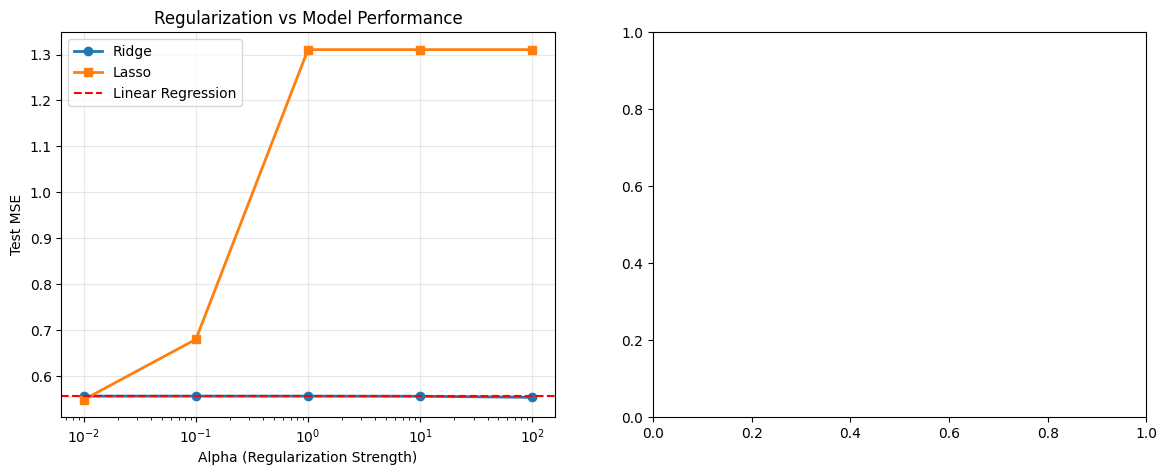

In [15]:
# 6. Visualization
print("\n" + "=" * 60)
print("6. Visualization")
print("التصور")
print("=" * 60)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Alpha vs MSE
axes[0].semilogx([r['alpha'] for r in ridge_results],
                 [r['mse'] for r in ridge_results],
                 'o-', label='Ridge', linewidth=2)
axes[0].semilogx([l['alpha'] for l in lasso_results],
                 [l['mse'] for l in lasso_results],
                 's-', label='Lasso', linewidth=2)
axes[0].axhline(lr_mse, color='r', linestyle='--', label='Linear Regression')
axes[0].set_xlabel('Alpha (Regularization Strength)')
axes[0].set_ylabel('Test MSE')
axes[0].set_title('Regularization vs Model Performance')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Coefficient magnitudes
axes[1].bar(range(10), np.abs(lr.coef_), alpha=0.7, label='Linear', width=0.25)
axes[1].bar([i + 0.25 for i in range(10)], np.abs(best_ridge['model'].coef_),
            alpha=0.7, label='Ridge', width=0.25)
axes[1].bar([i + 0.5 for i in range(10)], np.abs(best_lasso['model'].coef_),
            alpha=0.7, label='Lasso', width=0.25)
axes[1].set_xlabel('Feature Index')
axes[1].set_ylabel('Absolute Coefficient Value')
axes[1].set_title('Coefficient Comparison')
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig('ridge_lasso_comparison.png', dpi=300, bbox_inches='tight')
print("\n✓ Plot saved as 'ridge_lasso_comparison.png'")
plt.show()
print("\n" + "=" * 60)
print("Example 1 Complete! ✓")
print("اكتمل المثال 1! ✓")
print("=" * 60)